In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_science.csv')

In [3]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [4]:
df.shape

(607, 12)

In [5]:
df.drop(['Unnamed: 0','salary'], axis=1, inplace=True)

In [6]:
df

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M


In [7]:
df1 = df.groupby('work_year')['salary_in_usd'].mean()
df1

,salary_in_usd
work_year,
2020,95813.000000
2021,99853.792627
2022,124522.006289


In [8]:
df1.index

Index([2020, 2021, 2022], dtype='int64', name='work_year')

In [9]:
df1.values

array([ 95813.        ,  99853.79262673, 124522.00628931])

In [10]:
data = {
    'work_year':df1.index,
    'average_salary':df1.values
}

df1 = pd.DataFrame(data)
df1

,work_year,average_salary
0,2020,95813.000000
1,2021,99853.792627
2,2022,124522.006289


In [11]:
df1['average_salary']  = (df1['average_salary'] / 1000).round(2)

In [12]:
df1

,work_year,average_salary
0,2020,95.81
1,2021,99.85
2,2022,124.52


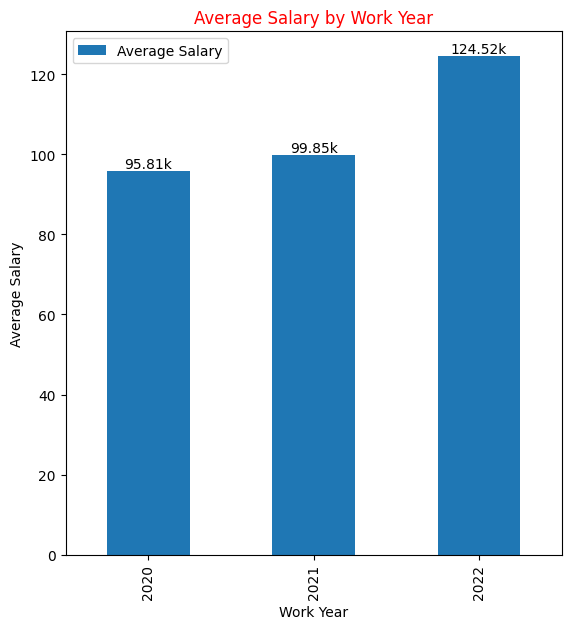

In [13]:
ax = df1.plot(kind = 'bar', x  = 'work_year', y = 'average_salary', legend = True)
ax.bar_label(ax.containers[0], labels=df1['average_salary'].map('{:.2f}k'.format))
plt.subplots_adjust(top = 1.2)
plt.legend(['Average Salary'], loc = 'upper left')
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average Salary by Work Year',color='r')
plt.show()

In [14]:
df2 = df.remote_ratio.value_counts()
df2

,count
remote_ratio,
100,381
0,127
50,99


In [15]:
values = df2.to_list()

In [16]:
labels = ['Fully remote','No remote','Partially remote']

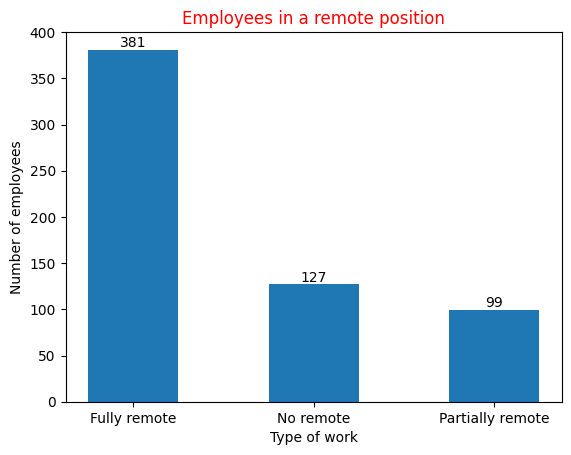

In [17]:
z = plt.bar(labels,values,width = 0.5)
plt.bar_label(z, labels = values)
plt.title('Employees in a remote position',color='r')
plt.xlabel('Type of work')
plt.ylabel('Number of employees')
plt.show()

In [18]:
df3 = df.company_size.value_counts()
df3

,count
company_size,
M,326
L,198
S,83


In [19]:
df3.index.to_list()

['M', 'L', 'S']

In [20]:
values2 = df3.to_list()

In [21]:
labels_for_company = ['Medium', 'Large', 'Small']

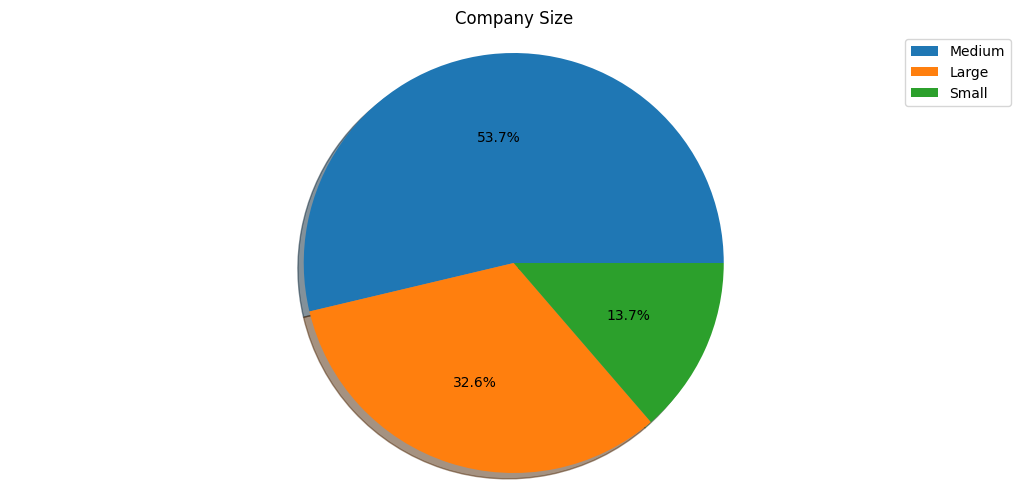

In [22]:
plt.figure(figsize = (13,6))
plt.pie(x = values2, labels = None, autopct = '%1.1f%%', shadow = True)
plt.axis('equal')
plt.legend(labels = labels_for_company, loc = 'upper right')
plt.title('Company Size')
plt.show()

In [23]:
df4 = df.job_title.value_counts()[:5]
df4

,count
job_title,
Data Scientist,143
Data Engineer,132
Data Analyst,97
Machine Learning Engineer,41
Research Scientist,16


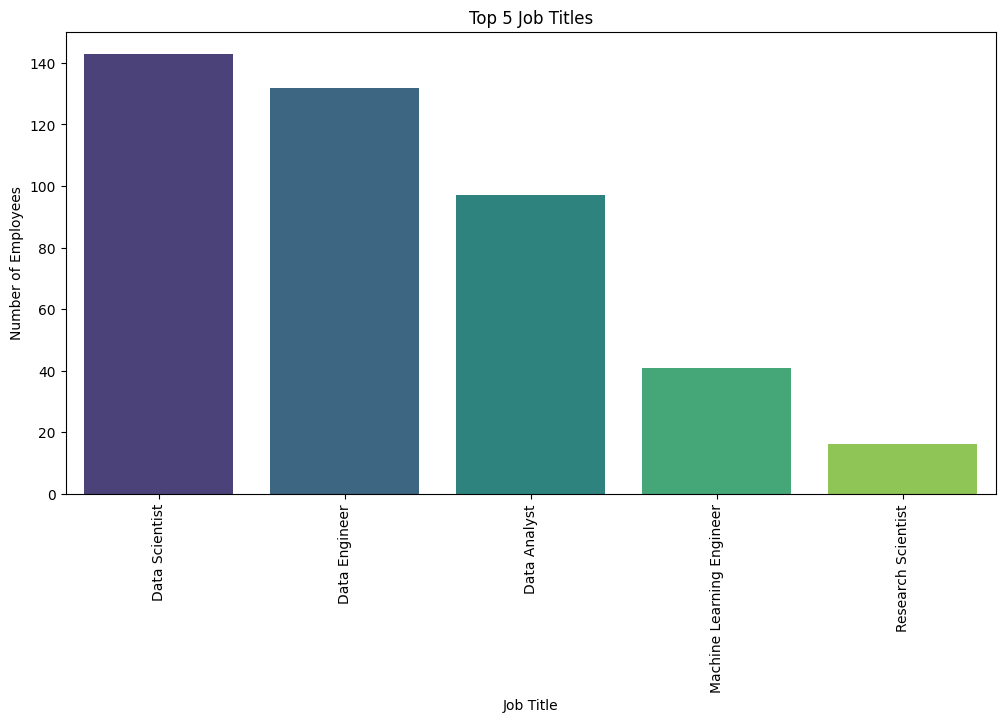

In [24]:
plt.figure(figsize = (12,6))
sns.barplot(x = df4.index, y = df4.values, palette = 'viridis')
plt.title('Top 5 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Number of Employees')
plt.xticks(rotation = 90)
plt.show()

In [25]:
df5 = df[['salary_in_usd','company_size']]
df5

,salary_in_usd,company_size
0,79833,L
1,260000,S
2,109024,M
3,20000,S
4,150000,L
...,...,...
602,154000,M
603,126000,M
604,129000,M
605,150000,M


In [26]:
S = df5[df5['company_size']=='S']
M = df5[df5['company_size']=='M']
L = df5[df5['company_size']=='L']
labels = ['Medium', 'Large', 'Small']
sal_mean = [S['salary_in_usd'].mean(), M['salary_in_usd'].mean(), L['salary_in_usd'].mean()]
sal_mean

[77632.67469879518, 116905.46625766871, 119242.99494949495]

In [27]:
label_change = np.round([x/1000 for x in sal_mean],2)
label_change = list(map(str,label_change))
label_change = [x + 'k' for x in label_change]
label_change

['77.63k', '116.91k', '119.24k']

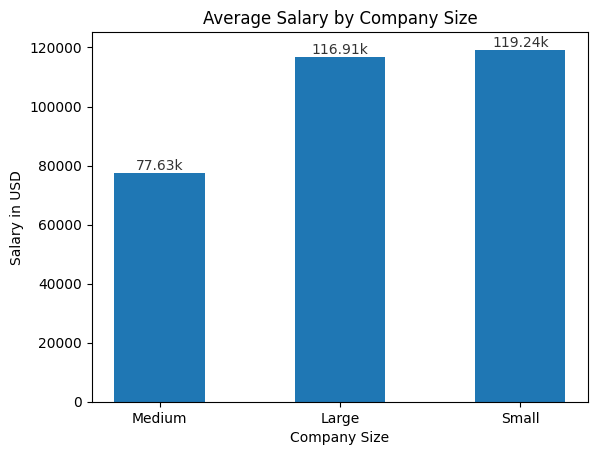

In [28]:
z = plt.bar(labels,sal_mean,width = 0.5)
plt.bar_label(z, label_change, alpha = 0.8)
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()

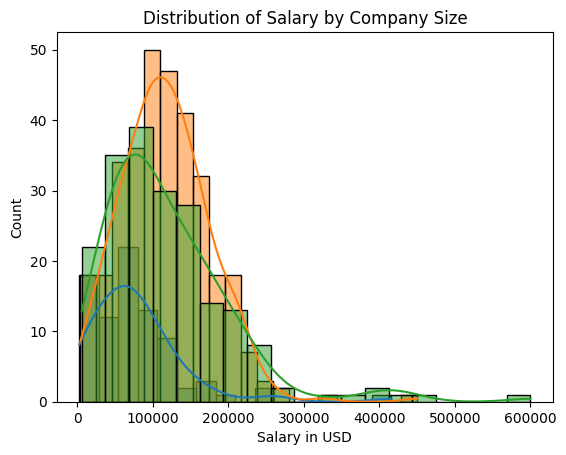

In [29]:
sns.histplot(S['salary_in_usd'], label = 'Small', kde = True)
sns.histplot(M['salary_in_usd'], label = 'Medium', kde = True)
sns.histplot(L['salary_in_usd'], label = 'Large', kde = True)
plt.title('Distribution of Salary by Company Size')
plt.xlabel('Salary in USD')
plt.show()

In [36]:
df6 = df.experience_level.value_counts()
df6

,count
experience_level,
Senior Engineer,280
Mid Level Engineer,213
Entry Level Engineer,88
Executive Level Engineer,26


In [37]:
exp_map = {
    'SE' : 'Senior Engineer',
    'MI' : 'Mid Level Engineer',
    'EN' : 'Entry Level Engineer',
    'EX' : 'Executive Level Engineer'
}

In [38]:
df['experience_level'].replace(exp_map, inplace = True)

In [39]:
labels = df6.index.to_list()
labels

['Senior Engineer',
 'Mid Level Engineer',
 'Entry Level Engineer',
 'Executive Level Engineer']

In [40]:
values = df6.values
values

array([280, 213,  88,  26])

Text(0.5, 1.0, 'Experience Level')

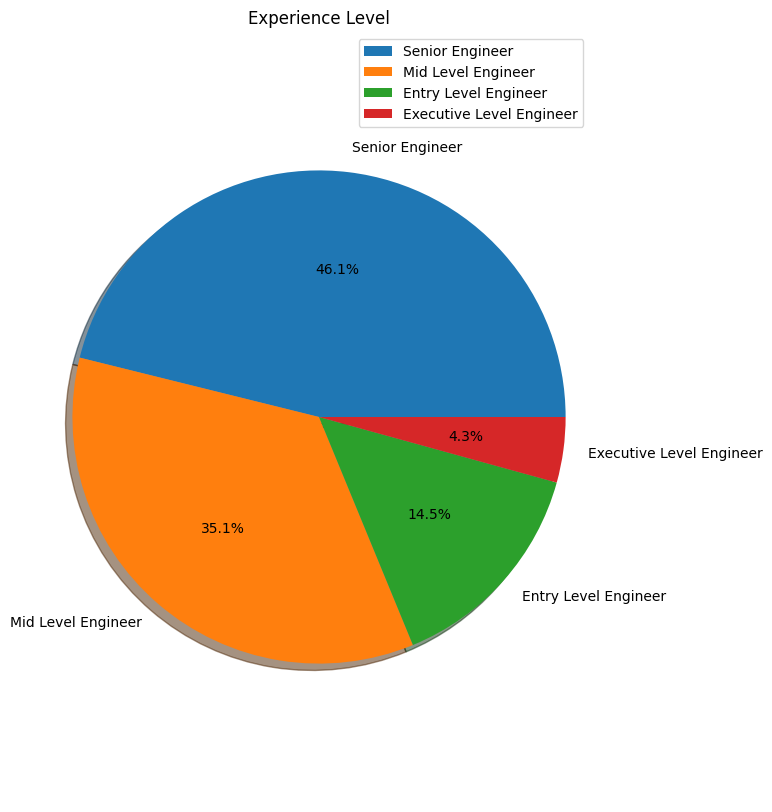

In [41]:
plt.figure(figsize = (7,10))
plt.pie(x = values , labels = labels, autopct = '%1.1f%%', shadow = True)
plt.axis('equal')
plt.legend(labels = labels, loc = 'upper right')
plt.title('Experience Level')